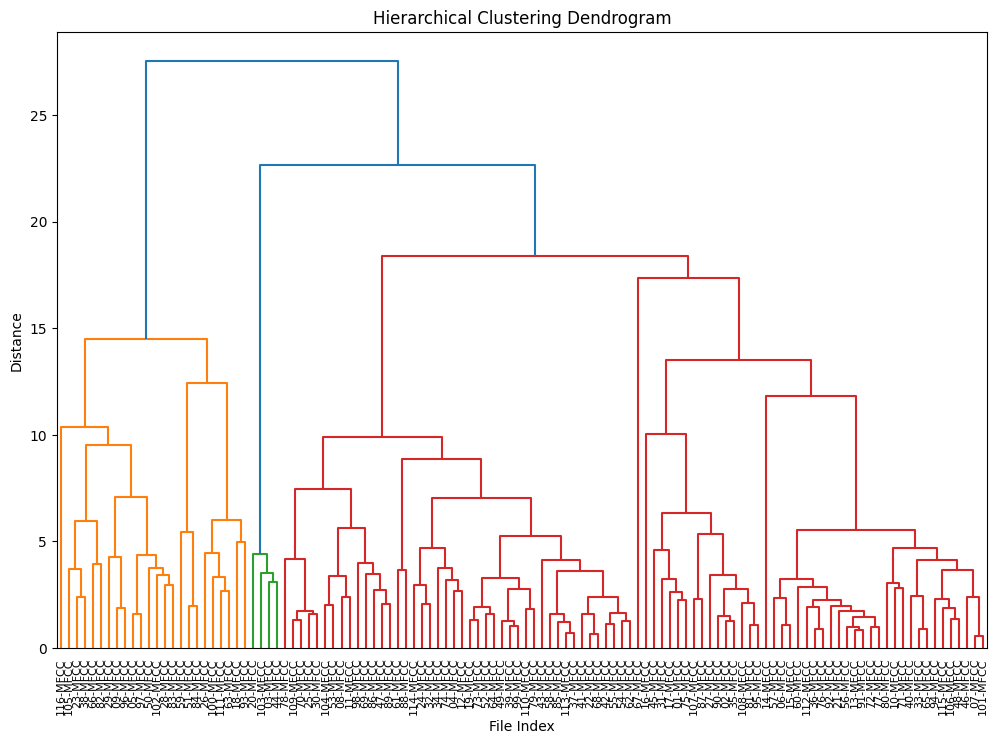

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa
import glob
import os
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Path to your CSV files
folder_path = "/home/avdhoot/third_sem/ds203/project/data/MFCC-files-v2/*.csv"  # Update this with your folder path

# Get all CSV files from the folder, sorted alphabetically
csv_files = sorted(glob.glob(folder_path))[:116]  # Ensure we're only taking 116 files

# Function to extract the first three MFCC coefficients and their derivatives
def extract_features(file_path):
    data = pd.read_csv(file_path, header=None).values

    # Extract the first three MFCC coefficients
    mfcc_1 = data[0]
    mfcc_2 = data[1]
    mfcc_3 = data[2]

    # Compute derivatives
    delta_mfcc_1 = librosa.feature.delta(mfcc_1)
    delta_mfcc_2 = librosa.feature.delta(mfcc_2)
    delta_mfcc_3 = librosa.feature.delta(mfcc_3)

    # Compute second derivatives
    delta2_mfcc_1 = librosa.feature.delta(mfcc_1, order=2)
    delta2_mfcc_2 = librosa.feature.delta(mfcc_2, order=2)
    delta2_mfcc_3 = librosa.feature.delta(mfcc_3, order=2)

    # Aggregate features using mean and variance
    features = [
        np.mean(mfcc_1), np.var(mfcc_1),
        np.mean(mfcc_2), np.var(mfcc_2),
        np.mean(mfcc_3), np.var(mfcc_3),
        np.mean(delta_mfcc_1), np.var(delta_mfcc_1),
        np.mean(delta_mfcc_2), np.var(delta_mfcc_2),
        np.mean(delta_mfcc_3), np.var(delta_mfcc_3),
        np.mean(delta2_mfcc_1), np.var(delta2_mfcc_1),
        np.mean(delta2_mfcc_2), np.var(delta2_mfcc_2),
        np.mean(delta2_mfcc_3), np.var(delta2_mfcc_3)
    ]

    return features

# Extract features for all files
features_list = []
file_names = []

for file_path in csv_files:
    features = extract_features(file_path)
    features_list.append(features)
    file_names.append(os.path.basename(file_path).replace(".csv", ""))

# Convert the list of features to a NumPy array
features_array = np.array(features_list)

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features_array)

# Perform PCA for dimensionality reduction (optional, for better visualization)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features_scaled)

# Perform hierarchical clustering
Z = linkage(features_scaled, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(Z, labels=file_names, leaf_rotation=90, leaf_font_size=8)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("File Index")
plt.ylabel("Distance")
plt.show()


/home/avdhoot/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/avdhoot/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/avdhoot/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/avdhoot/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/avdhoot/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/avdhoot/.local/lib/python3.10/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/home/avdhoot/.local/lib/python3.10/site-packages/nu

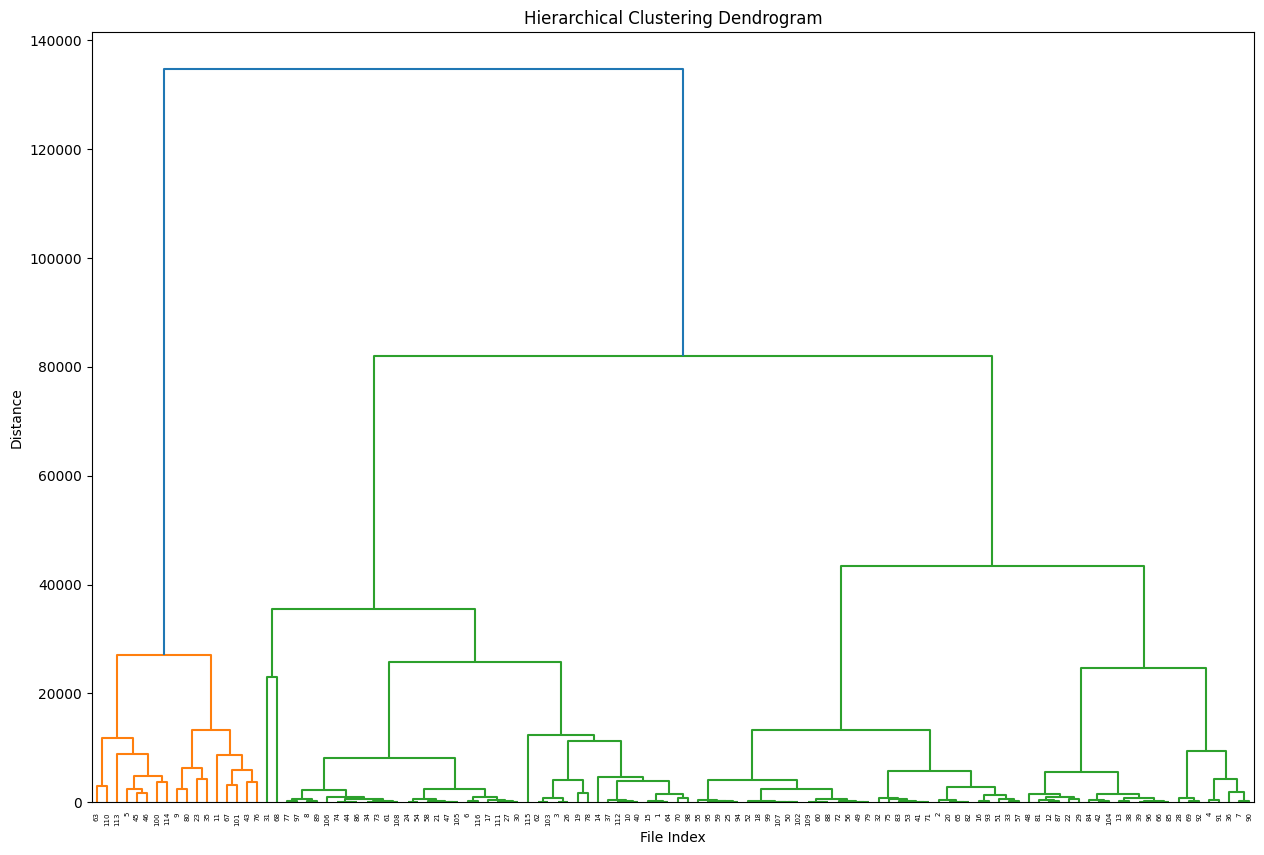


Cluster 4:
  - 01-MFCC.csv
  - 03-MFCC.csv
  - 06-MFCC.csv
  - 08-MFCC.csv
  - 10-MFCC.csv
  - 103-MFCC.csv
  - 104-MFCC.csv
  - 106-MFCC.csv
  - 108-MFCC.csv
  - 11-MFCC.csv
  - 112-MFCC.csv
  - 114-MFCC.csv
  - 115-MFCC.csv
  - 13-MFCC.csv
  - 17-MFCC.csv
  - 20-MFCC.csv
  - 23-MFCC.csv
  - 27-MFCC.csv
  - 30-MFCC.csv
  - 37-MFCC.csv
  - 41-MFCC.csv
  - 44-MFCC.csv
  - 45-MFCC.csv
  - 47-MFCC.csv
  - 53-MFCC.csv
  - 56-MFCC.csv
  - 57-MFCC.csv
  - 60-MFCC.csv
  - 61-MFCC.csv
  - 69-MFCC.csv
  - 72-MFCC.csv
  - 80-MFCC.csv
  - 81-MFCC.csv
  - 86-MFCC.csv
  - 88-MFCC.csv
  - 89-MFCC.csv
  - 91-MFCC.csv
  - 94-MFCC.csv
  - 95-MFCC.csv
  - 98-MFCC.csv
  - 99-MFCC.csv

Cluster 5:
  - 02-MFCC.csv
  - 105-MFCC.csv
  - 107-MFCC.csv
  - 109-MFCC.csv
  - 113-MFCC.csv
  - 15-MFCC.csv
  - 16-MFCC.csv
  - 24-MFCC.csv
  - 32-MFCC.csv
  - 33-MFCC.csv
  - 34-MFCC.csv
  - 35-MFCC.csv
  - 36-MFCC.csv
  - 38-MFCC.csv
  - 39-MFCC.csv
  - 40-MFCC.csv
  - 42-MFCC.csv
  - 43-MFCC.csv
  - 48-MFCC.csv
  - 5

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.stats import skew, kurtosis

# Define the folder path where your CSV files are located
folder_path = "/home/avdhoot/third_sem/ds203/project/data/MFCC-files-v2"

# Collect all filenames
csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])

# Define the indices for MFCC coefficients (e.g., the first 3 coefficients)
selected_coefficients = [0, 1, 2]
features = []

# Load each file and extract the relevant features
for file in csv_files:
    file_path = os.path.join(folder_path, file)
    data = pd.read_csv(file_path, header=None)

    # Initialize a list to store features for the current file
    file_features = []

    # Extract features for each selected coefficient
    for coeff_idx in selected_coefficients:
        coeff_series = data.iloc[:, coeff_idx]

        # Calculate statistical features with error handling
        mean_val = np.nanmean(coeff_series)
        variance = np.nanvar(coeff_series)
        skewness = np.nan_to_num(skew(coeff_series), nan=0.0)
        kurt = np.nan_to_num(kurtosis(coeff_series), nan=0.0)
        max_val = np.nanmax(coeff_series)
        min_val = np.nanmin(coeff_series)

        # Autocorrelation with error handling
        if np.std(coeff_series) == 0:
            auto_corr = 0.0
        else:
            auto_corr = np.corrcoef(coeff_series[:-1], coeff_series[1:])[0, 1]
            if not np.isfinite(auto_corr):
                auto_corr = 0.0

        # Append features to the list
        file_features.extend([mean_val, variance, skewness, kurt, max_val, min_val, auto_corr])

    # Calculate delta and double delta features
    delta_series = np.diff(data.iloc[:, selected_coefficients], axis=0)
    double_delta_series = np.diff(delta_series, axis=0)

    for i in range(len(selected_coefficients)):
        delta = delta_series[:, i]
        double_delta = double_delta_series[:, i]

        # Extract features for delta and double delta with error handling
        delta_mean = np.nanmean(delta)
        delta_var = np.nanvar(delta)
        double_delta_mean = np.nanmean(double_delta)
        double_delta_var = np.nanvar(double_delta)

        # Append features
        file_features.extend([delta_mean, delta_var, double_delta_mean, double_delta_var])

    # Replace any remaining NaN or infinite values with zero
    file_features = [0.0 if not np.isfinite(x) else x for x in file_features]

    # Append the complete feature vector for the current file
    features.append(file_features)

# Convert features to a NumPy array
features = np.array(features)

# Check for NaN or infinite values in the feature array
if not np.isfinite(features).all():
    print("Warning: The feature array contains NaN or infinite values. Replacing them with zeros.")
    features = np.nan_to_num(features)

# Perform hierarchical clustering using 'ward' method
Z = linkage(features, method='ward')

# Plot the dendrogram
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=np.arange(1, len(csv_files) + 1))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('File Index')
plt.ylabel('Distance')
plt.show()

# Cut the dendrogram to form clusters (choose the number of clusters as 6)
num_clusters = 6
labels = fcluster(Z, num_clusters, criterion='maxclust')

# Group filenames by cluster
clusters = {}
for i, label in enumerate(labels):
    if label not in clusters:
        clusters[label] = []
    clusters[label].append(csv_files[i])

# Display filenames in each cluster
for cluster_id, filenames in clusters.items():
    print(f"\nCluster {cluster_id}:")
    for filename in filenames:
        print(f"  - {filename}")


In [8]:
import os
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming the CSV files are in a directory called 'data'
data_dir = '/home/avdhoot/third_sem/ds203/project/data/MFCC-files-v2'

# Load all CSV files into a single DataFrame
all_data = pd.DataFrame()
for file in os.listdir(data_dir):
    if file.endswith('.csv'):
        song_data = pd.read_csv(os.path.join(data_dir, file), header=None)
        all_data = pd.concat([all_data, song_data], ignore_index=True)

# Perform feature selection (optional)
# You can select the top 2 or 3 MFCC coefficients that show the most variance
from sklearn.feature_selection import VarianceThreshold
selector = VarianceThreshold(threshold=0.1)
X = selector.fit_transform(all_data)

# Perform K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X)

# Predict cluster assignments for each song
labels = kmeans.labels_

# Visualize the clustering results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.xlabel('MFCC 1')
plt.ylabel('MFCC 2')
plt.title('Gender Classification using MFCC and K-Means')
plt.show()

# Print the cluster assignments
print("Cluster assignments:")
for i, label in enumerate(labels):
    print(f"Song {i+1}: Cluster {label+1}")

ValueError: Input X contains NaN.
KMeans does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values